In [1]:
import bilby

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ADD_NOISE=True

X = np.linspace(-1,1,50).reshape(-1,1)
# y = X**2
y = np.tanh(X*2)
# y = tanh_deriv(X*4)
# y = tanh_2nd_deriv(X*4)

if ADD_NOISE:
    ep = 0.05
    noise = np.random.normal(0, ep, size=X.shape)
    y = y+noise

Text(0.5, 1.0, '$y(x) = \\rm{Tanh}(2x)$')

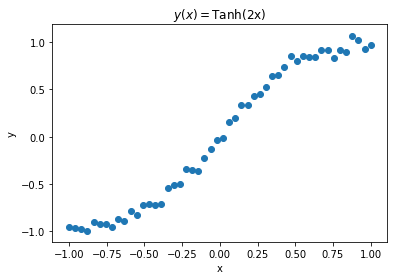

In [4]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$y(x) = \rm{Tanh}(2x)$")

In [5]:
def model(X, w0, b0, w1, b1):
    """
    X: input data. X.shape = (N, 1)
    w0: layer 0 weights. w0.shape = (1, U)
    b0: layer 0 biases. b0.shape = (U,)
    w1: layer 1 weights. w1.shape = (U, 1)
    b1: layer 1 biases. b1.shape = (1,)
    
    returns the output of a 1 hidden layer neural network
    with U hidden units
    """
    a0 = np.dot(X, w0) + b0
    z0 = np.tanh(a0)
    a1 = np.dot(z0, w1) + b1
    z1 = a1
    return z1

In [6]:
def model4bilby(X, w0_0, b0_0, w1_0, b1_0):
    w0 = np.array([[w0_0]])
    b0 = np.array([b0_0])
    w1 = np.array([[w1_0]])
    b1 = np.array([b1_0])
    
    return model(X, w0, b0, w1, b1)

In [7]:
# true parameters
w0_0_true = -2
b0_0_true = 0
w1_0_true = -1
b1_0_true = 0

In [8]:
yhat = model4bilby(X, w0_0_true, b0_0_true, w1_0_true, b1_0_true)

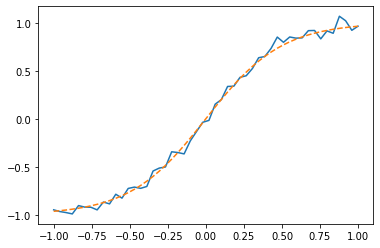

In [9]:
plt.figure()
plt.plot(X, y)
plt.plot(X, yhat, ls='--')

In [10]:
injection_parameters = dict(
    w0_0=w0_0_true,
    b0_0=b0_0_true,
    w1_0=w1_0_true,
    b1_0=b1_0_true,
    sigma=0.05
)

In [11]:
# Now lets instantiate the built-in GaussianLikelihood, giving it
# the time, data and signal model. Note that, because we do not give it the
# parameter, sigma is unknown and marginalised over during the sampling
likelihood = bilby.core.likelihood.GaussianLikelihood(X, y, model4bilby)

priors = dict()
priors['w0_0'] = bilby.core.prior.Uniform(-5, 5, 'w0_0')
priors['b0_0'] = bilby.core.prior.Uniform(-5, 5, 'b0_0')
priors['w1_0'] = bilby.core.prior.Uniform(-5, 5, 'w1_0')
priors['b1_0'] = bilby.core.prior.Uniform(-5, 5, 'b1_0')
priors['sigma'] = bilby.core.prior.Uniform(0, 10, 'sigma')

In [12]:
priors

{'w0_0': Uniform(minimum=-5, maximum=5, name='w0_0', latex_label='w0_0', unit=None, boundary=None),
 'b0_0': Uniform(minimum=-5, maximum=5, name='b0_0', latex_label='b0_0', unit=None, boundary=None),
 'w1_0': Uniform(minimum=-5, maximum=5, name='w1_0', latex_label='w1_0', unit=None, boundary=None),
 'b1_0': Uniform(minimum=-5, maximum=5, name='b1_0', latex_label='b1_0', unit=None, boundary=None),
 'sigma': Uniform(minimum=0, maximum=10, name='sigma', latex_label='sigma', unit=None, boundary=None)}

In [13]:
# A few simple setup steps
label = 'nn_first_test'
outdir = 'nn_outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)


In [14]:
# !rm -rf nn-outdir

In [15]:
# And run sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='emcee', npoints=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    nwalkers=500, nsteps=300, nburn=100,
    label=label)

16:23 bilby INFO    : Running for label 'nn_first_test', output will be saved to 'nn_outdir'
16:23 bilby INFO    : Search parameters:
16:23 bilby INFO    :   w0_0 = Uniform(minimum=-5, maximum=5, name='w0_0', latex_label='w0_0', unit=None, boundary=None)
16:23 bilby INFO    :   b0_0 = Uniform(minimum=-5, maximum=5, name='b0_0', latex_label='b0_0', unit=None, boundary=None)
16:23 bilby INFO    :   w1_0 = Uniform(minimum=-5, maximum=5, name='w1_0', latex_label='w1_0', unit=None, boundary=None)
16:23 bilby INFO    :   b1_0 = Uniform(minimum=-5, maximum=5, name='b1_0', latex_label='b1_0', unit=None, boundary=None)
16:23 bilby INFO    :   sigma = Uniform(minimum=0, maximum=10, name='sigma', latex_label='sigma', unit=None, boundary=None)
16:23 bilby INFO    : Single likelihood evaluation took 2.044e-04 s
16:23 bilby WARNING : Supplied argument 'npool' not an argument of 'Emcee', removing.
16:23 bilby WARNING : Supplied argument 'npoints' not an argument of 'Emcee', removing.
16:23 bilby WARN

In [16]:
result.plot_corner()

RuntimeError: latex was not able to process the following string:
b'$\\u22124$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/spx8sk/.matplotlib/tex.cache/63f98e5ae94c9cda7f75acedb430840f.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./63f98e5ae94c9cda7f75acedb430840f.aux)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! Package inputenc Error: Unicode character − (U+2212)
(inputenc)                not set up for use with LaTeX.

See the inputenc package documentation for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.14 ...tsize{10.000000}{12.500000}{\sffamily $−
                                                  4$}
No pages of output.
Transcript written on 63f98e5ae94c9cda7f75acedb430840f.log.




<Figure size 849.6x849.6 with 25 Axes>